In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
df = pd.read_csv("../../Data/00.통합.csv")
df.columns

Index(['년도', '시도', '사설학원수', '대학교_숫자', '중학생인원수변화', '초등학생인원수변화', '고등학생인원수변화',
       '유치원원아수변화', '대학생숫자', '의원', '병원', '종합병원', '상급종합병원', '의사', '치과의사', '한의사',
       '약사', '간호사', '기타보건의료인', '주택수', '빈집수', '자동차등록대수', '전입인구', '전출인구', '활동',
       '신생', '소멸', '상용_월평균_임금', '임금상승률', '협회 및 단체, 수리 및 기타 개인서비스업_활동',
       '협회 및 단체, 수리 및 기타 개인서비스업_신생', '협회 및 단체, 수리 및 기타 개인서비스업_소멸',
       '예술, 스포츠 및 여가관련 서비스업_활동', '예술, 스포츠 및 여가관련 서비스업_신생',
       '예술, 스포츠 및 여가관련 서비스업_소멸', '보건업 및 사회복지 서비스업_활동', '보건업 및 사회복지 서비스업_신생',
       '보건업 및 사회복지 서비스업_소멸', '교육서비스업_활동', '교육서비스업_신생', '교육서비스업_소멸',
       '사업 시설관리, 사업지원 및 임대 서비스업_활동', '사업 시설관리, 사업지원 및 임대 서비스업_신생',
       '사업 시설관리, 사업지원 및 임대 서비스업_소멸', '전문, 과학 및 기술서비스업_활동',
       '전문, 과학 및 기술서비스업_신생', '전문, 과학 및 기술서비스업_소멸', '부동산업_활동', '부동산업_신생',
       '부동산업_소멸', '금융 및 보험업_활동', '금융 및 보험업_신생', '금융 및 보험업_소멸', '정보통신업_활동',
       '정보통신업_신생', '정보통신업_소멸', '숙박 및 음식점업_활동', '숙박 및 음식점업_신생', '숙박 및 음식점업_소멸',
       '운수 및 창고업_활동', '운수 및 창고업_신생', '운수 및 창고업_소멸', '도매 및 소매업_활동',
     

In [3]:
len(df.columns)

92

In [4]:
df.iloc[:,29]
# df.iloc[:,27]

0      53177
1      47929
2      15770
3      17554
4      11126
       ...  
131    10562
132    10385
133    10881
134     4745
135     1471
Name: 협회 및 단체, 수리 및 기타 개인서비스업_활동, Length: 136, dtype: int64

In [5]:
companies = pd.concat([df.iloc[:,29], df.iloc[:,27]], axis=1)
edu = pd.concat([df.iloc[:,2:3], df.iloc[:,7]], axis=1)
companies.head()

,"협회 및 단체, 수리 및 기타 개인서비스업_활동",상용_월평균_임금
0,53177,2735767.0
1,47929,3168798.0
2,15770,2612430.0
3,17554,2520222.0
4,11126,2315945.0


In [6]:
edu.columns

Index(['사설학원수', '유치원원아수변화'], dtype='object')

## k-means

In [7]:
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(edu)
    scores.append(km.inertia_)
    
plt.plot(range(2, 10), scores)
plt.show()

NameError: name 'KMeans' is not defined

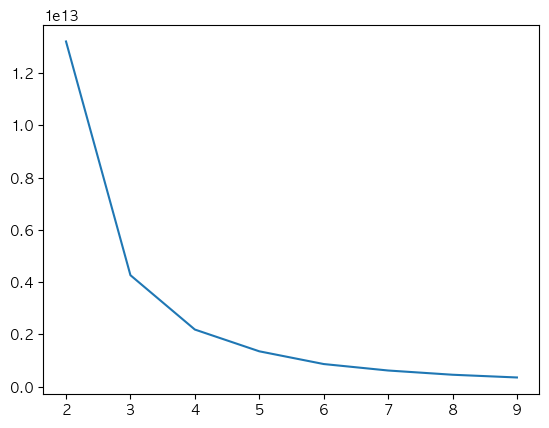

In [ ]:
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(companies)
    scores.append(km.inertia_)
    
plt.plot(range(2, 10), scores)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
# companies
data_points = companies.values
kmeans = KMeans(n_clusters=5).fit(data_points) #n_clusters: 5분류
companies['cluster_id'] = kmeans.labels_

# edu
data_points = edu.values
kmeans = KMeans(n_clusters=5).fit(data_points) #n_clusters: 5분류
edu['cluster_id'] = kmeans.labels_

edu.head()

,사설학원수,유치원원아수변화,cluster_id
0,18134,182231,1
1,13405,92400,4
2,5662,50370,0
3,4638,44217,0
4,3639,34550,0


In [ ]:
result = pd.DataFrame(companies.cluster_id == edu.cluster_id)
result.value_counts()

cluster_id
False         103
True           33
dtype: int64